In [2]:
# In this project we attempt to check the normality of our variables using graphical and statistical methods 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats 
import pylab
import seaborn as sns
import random


In [3]:
df = pd.read_csv('Stroke_data_cleaned.csv')

In [4]:
df

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,58.0,1.0,0.0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
1,1,Female,70.0,0.0,0.0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
2,2,Female,52.0,0.0,0.0,Yes,Private,Urban,77.59,17.7,formerly smoked,0.0
3,3,Female,75.0,0.0,1.0,Yes,Self-employed,Rural,243.53,27.0,never smoked,0.0
4,4,Female,32.0,0.0,0.0,Yes,Private,Rural,77.67,32.3,smokes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28911,29060,Female,10.0,0.0,0.0,No,children,Urban,58.64,20.4,never smoked,0.0
28912,29061,Female,56.0,0.0,0.0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0.0
28913,29062,Female,82.0,1.0,0.0,Yes,Private,Urban,91.94,28.9,formerly smoked,0.0
28914,29063,Male,40.0,0.0,0.0,Yes,Private,Urban,99.16,33.2,never smoked,0.0


avg glucose level male z=0.878, p = 0.000



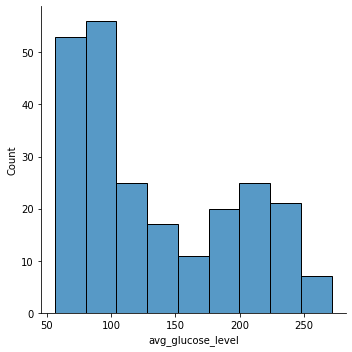

In [8]:
df_glu_male_stroke = df.loc[(df['gender']=='Male') & (df['stroke']==1.0)].avg_glucose_level
#print(df_glu_male_stroke)
sns.displot(df_glu_male_stroke) 
from scipy.stats import shapiro
result, p = shapiro(df_glu_male_stroke)
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

In [10]:
# checking if mean = median = mode

print('female',df_female_glucose.mean(), df_female_glucose.median(), df_female_glucose.mode())
print('male',df_male_glucose.mean(), df_male_glucose.median(), df_male_glucose.mode())

female 104.58679027629216 91.57 0    73.0
Name: avg_glucose_level, dtype: float64
male 109.26076357110837 92.95 0    83.1
Name: avg_glucose_level, dtype: float64


In [11]:
print(df_male_glucose.info(0), df_female_glucose.info(0))

<class 'pandas.core.series.Series'>
Int64Index: 11145 entries, 0 to 28914
dtypes: float64(1)
memory usage: 174.1 KB
<class 'pandas.core.series.Series'>
Int64Index: 17771 entries, 1 to 28915
dtypes: float64(1)
memory usage: 277.7 KB
None None


In [12]:
df_male_glucose.name = 'avg glucose level - male'
df_female_glucose.name = 'avg glucose level - female'

C:\Users\Aya\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aya\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg glucose level - male'>

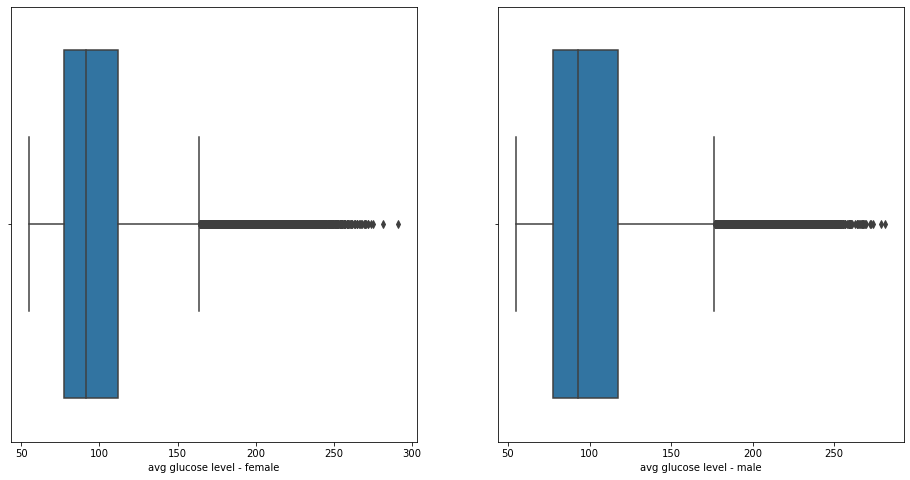

In [7]:
# checking using boxplot

fig, axes = plt.subplots(1,2, figsize=(16,8))

sns.boxplot(df_female_glucose, ax=axes[0])
sns.boxplot(df_male_glucose,  ax=axes[1])

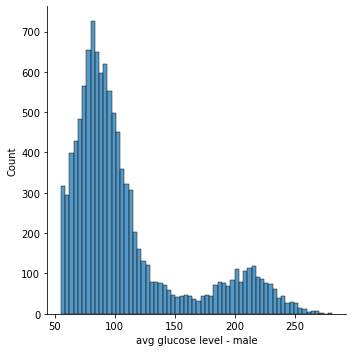

In [14]:
# checking using histograms 
sns.displot(df_male_glucose) 

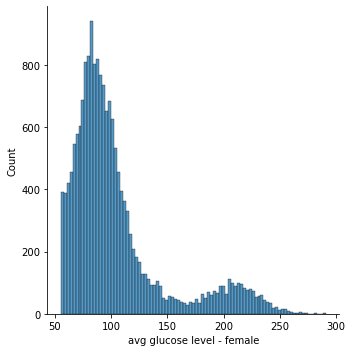

In [15]:
sns.displot(df_female_glucose)

Text(0.5, 1.0, 'Q-Q plot for avg glucose level - male')

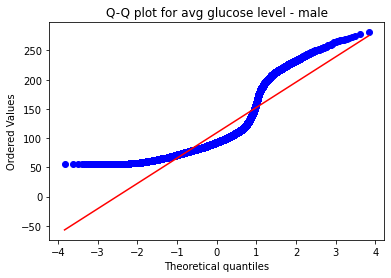

In [8]:
#using Q-Q plot
fig, ax = plt.subplots(figsize=(6, 4))
fig = stats.probplot(df_male_glucose, dist="norm", plot=plt)
ax.set_title("Q-Q plot for avg glucose level - male")

Text(0.5, 1.0, 'Q-Q plot for avg glucose level - female')

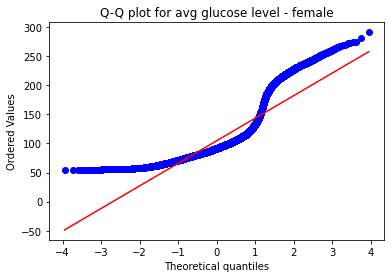

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = stats.probplot(df_female_glucose, dist="norm", plot=plt)
ax.set_title("Q-Q plot for avg glucose level - female")

In [31]:
## Statistical tests - Shapiro-Wilk 
from scipy.stats import shapiro
result, p = shapiro(df_female_glucose)
print('avg glucose level female','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female z=0.801, p = 0.000



In [34]:
## Statistical tests - Shapiro-Wilk 
from scipy.stats import shapiro
result, p = shapiro(df_male_glucose)
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level male z=0.811, p = 0.000



In [35]:
## Statistical tests -  Skewness
from scipy.stats import skewtest
result, p = skewtest(df_female_glucose)
print('avg glucose level female','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female z=64.964, p = 0.000



In [36]:
## Statistical tests -  Skewness
from scipy.stats import skewtest
result, p = skewtest(df_male_glucose)
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level male z=46.652, p = 0.000



In [37]:
## Statistical tests -  Skewness
from scipy.stats import kurtosistest
result, p = kurtosistest(df_female_glucose)
print('avg glucose level female','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female z=29.728, p = 0.000



In [38]:
## Statistical tests -  Skewness
from scipy.stats import kurtosistest
result, p = kurtosistest(df_male_glucose)
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level male z=14.917, p = 0.000



In [55]:
##Statistical tests - Kolmogorov-Smirnov
from scipy.stats import kstest
result, p = kstest(df_male_glucose, "norm")
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level male z=1.000, p = 0.000



In [39]:
##Statistical tests - Kolmogorov-Smirnov
from scipy.stats import kstest
result, p = kstest(df_female_glucose, "norm")
print('avg glucose level female','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female z=1.000, p = 0.000



In [73]:
## Statistical tests - Anderson-Darling
from scipy.stats import anderson 
result = anderson(df_male_glucose)
print('avg glucose level male','z=%0.3f\n' % (result.statistic))
print(result.critical_values)
print(result.significance_level)

avg glucose level male z=797.411

[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


In [74]:
## Statistical tests - Anderson-Darling
from scipy.stats import anderson 
result = anderson(df_female_glucose)
print('avg glucose level female','z=%0.3f\n' % (result.statistic))
print(result.critical_values)
print(result.significance_level)

avg glucose level female z=1223.294

[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


In [43]:
##  removing outliers
Q1 = df_male_glucose.quantile(0.25)
Q3 = df_male_glucose.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_male_glucose >= Q1 - 1.5 * IQR) & (df_male_glucose <= Q3 + 1.5 *IQR)
df_male_glucose_clean = df_male_glucose.loc[filter]

Q1 = df_female_glucose.quantile(0.25)
Q3 = df_female_glucose.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_female_glucose >= Q1 - 1.5 * IQR) & (df_female_glucose <= Q3 + 1.5 *IQR)
df_female_glucose_clean = df_female_glucose.loc[filter]

In [48]:
print('female',df_female_glucose_clean.mean(), df_female_glucose_clean.median(), df_female_glucose_clean.mode())
print('male',df_male_glucose_clean.mean(), df_male_glucose_clean.median(), df_male_glucose_clean.mode())

female 90.98086679819215 88.11 0    73.0
Name: avg glucose level - female, dtype: float64
male 92.1464247621039 88.33 0    83.1
Name: avg glucose level - male, dtype: float64


C:\Users\Aya\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aya\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg glucose level - male'>

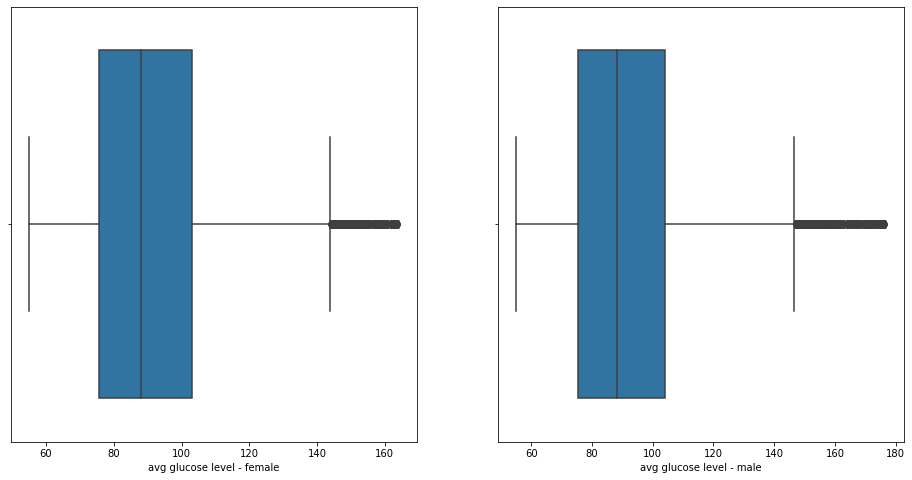

In [44]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

sns.boxplot(df_female_glucose_clean, ax=axes[0])
sns.boxplot(df_male_glucose_clean,  ax=axes[1])

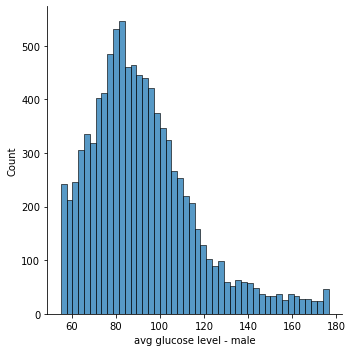

In [45]:
sns.displot(df_male_glucose_clean)

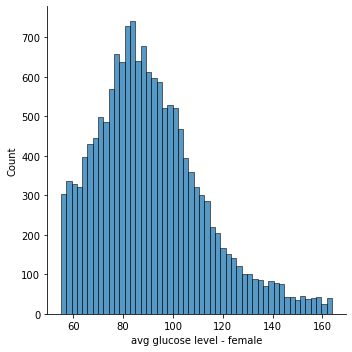

In [46]:
sns.displot(df_female_glucose_clean)

Text(0.5, 1.0, 'Q-Q plot for avg glucose level - male')

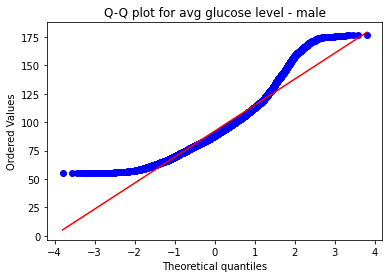

In [49]:
#using Q-Q plot
fig, ax = plt.subplots(figsize=(6, 4))
fig = stats.probplot(df_male_glucose_clean, dist="norm", plot=plt)
ax.set_title("Q-Q plot for avg glucose level - male")

Text(0.5, 1.0, 'Q-Q plot for avg glucose level - female')

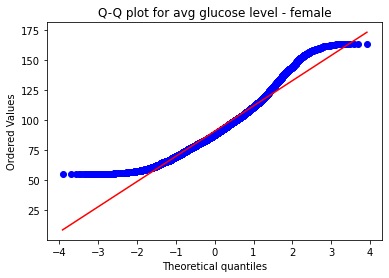

In [50]:
#using Q-Q plot
fig, ax = plt.subplots(figsize=(6, 4))
fig = stats.probplot(df_female_glucose_clean, dist="norm", plot=plt)
ax.set_title("Q-Q plot for avg glucose level - female")

In [53]:
## Statistical tests - Shapiro Wilk 
from scipy.stats import shapiro
result, p = shapiro(df_male_glucose_clean)
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level male z=0.935, p = 0.000



In [98]:
## Statistical tests - Shapiro Wilk 
from scipy.stats import shapiro
result, p = shapiro(df_female_glucose_clean)
print('avg glucose level female','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female z=0.960, p = 0.000



C:\Users\Aya\.julia\conda\3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [56]:
## Statistical tests -  Skewness-Kurtosis
from scipy.stats import skewtest
result, p = skewtest(df_female_glucose_clean)
print('avg glucose level female','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female z=34.954, p = 0.000



In [55]:
## Statistical tests -  Skewness-Kurtosis
from scipy.stats import skewtest
result, p = skewtest(df_male_glucose_clean)
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level male z=34.807, p = 0.000



In [57]:
## Statistical tests -  Skewness-Kurtosis
from scipy.stats import kurtosistest
result, p = kurtosistest(df_female_glucose_clean)
print('avg glucose level female','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female z=10.273, p = 0.000



In [59]:
## Statistical tests -  Skewness-Kurtosis
from scipy.stats import kurtosistest
result, p = kurtosistest(df_male_glucose_clean)
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level male z=15.840, p = 0.000



In [60]:
##Statistical tests - Kolmogorov-Smirnov
from scipy.stats import kstest
result, p = kstest(df_female_glucose_clean, "norm")
print('avg glucose level female','stats=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female stats=1.000, p = 0.000



In [54]:
##Statistical tests - Kolmogorov-Smirnov
from scipy.stats import kstest
result, p = kstest(df_male_glucose_clean, "norm")
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

NameError: name 'df_male_glucose_clean' is not defined

In [72]:
## Statistical tests - Anderson-Darling
from scipy.stats import anderson 
result = anderson(df_male_glucose_clean)
print('avg glucose level male','z=%0.3f\n' % (result.statistic))
print(result.critical_values)
print(result.significance_level)

avg glucose level male z=134.843

[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


In [70]:
## Statistical tests - Anderson-Darling
from scipy.stats import anderson 
result = anderson(df_female_glucose_clean)
print('avg glucose level female','z=%0.3f\n' % (result.statistic))
print(result.critical_values)
print(result.significance_level)

avg glucose level female z=125.964

[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


In [67]:
# checking for fasting glucose levels  
df_male_glucose_fasting = df_male_glucose_clean.loc[(df_male_glucose_clean >= 70) & (df_male_glucose_clean <= 140)]
df_male_glucose_fasting.mean()

94.00617826780041

In [71]:
df_male_glucose_clean2 = df_male_glucose_clean.loc[(df_male_glucose_clean >= 70)]


C:\Users\Aya\.julia\conda\3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg glucose level - male', ylabel='Density'>

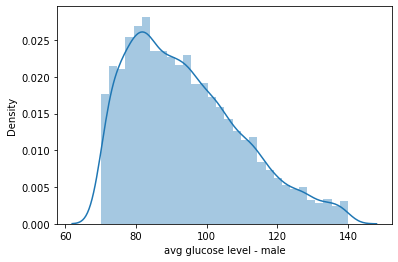

In [68]:
sns.distplot(df_male_glucose_fasting)

C:\Users\Aya\.julia\conda\3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg glucose level - male', ylabel='Density'>

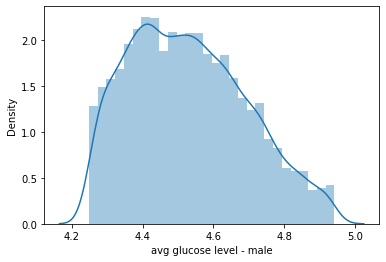

In [69]:
sns.distplot(np.log(df_male_glucose_fasting))

C:\Users\Aya\.julia\conda\3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg glucose level - male', ylabel='Density'>

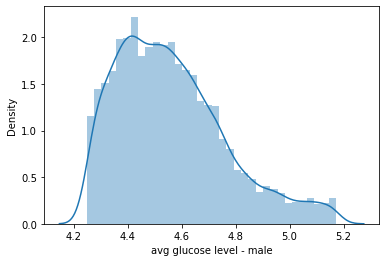

In [72]:
sns.distplot(np.log(df_male_glucose_clean2))

In [17]:
df_male_bmi = df.loc[df['gender'] == 'Male'].bmi
df_female_bmi = df.loc[df['gender'] == 'Female'].bmi

In [25]:
from scipy.stats import kstest
result, p = kstest(df_female_bmi, "norm")
print('avg glucose level female','stats=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level female stats=1.000, p = 0.000



In [86]:
df_male_glucose.loc[(df_male_glucose >= 80) & (df_male_glucose <= 120)].size/df_male_glucose.size * 100

47.5818752803948

In [84]:
df_male_glucose.size

11145

In [95]:
df_male_glucose_sample = df_male_glucose_clean.sample(1000)

C:\Users\Aya\.julia\conda\3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg glucose level - male', ylabel='Density'>

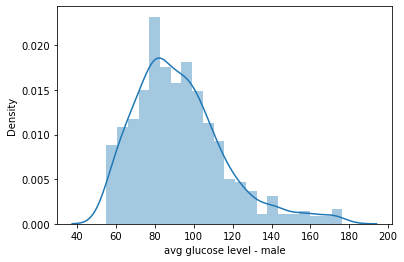

In [97]:
sns.distplot(df_male_glucose_sample)

In [99]:
## Statistical tests - Shapiro Wilk 
from scipy.stats import shapiro
result, p = shapiro(df_male_glucose_sample)
print('avg glucose level male','z=%0.3f, p = %0.3f\n' % (result, p))

avg glucose level male z=0.941, p = 0.000



In [36]:
## Stratified Sampling 
df_male_glucose.size
#df_male_glucose_fasting = df_male_glucose.loc[(df_male_glucose >= 80)]

df_male_glucose1 = df_male_glucose.loc[(df_male_glucose <= 100)]
df_male_glucose2 = df_male_glucose.loc[(df_male_glucose > 100) & (df_male_glucose <= 140) ]
df_male_glucose3 = df_male_glucose.loc[(df_male_glucose > 140) ]

In [37]:
#sns.histplot(df_male_glucose_fasting)

In [39]:
df_male_glucose.size

11145

In [45]:
df_male_glucose1.size/df_male_glucose.size

0.5977568416330193

In [44]:
df_male_glucose2.size/df_male_glucose.size

0.21713772992373262

In [43]:
df_male_glucose3.size/df_male_glucose.size

0.1851054284432481

In [48]:
df_male_glucose1_sample = df_male_glucose1.sample(60)
df_male_glucose2_sample = df_male_glucose2.sample(22)
df_male_glucose3_sample = df_male_glucose3.sample(18)

In [49]:
df3 = df_male_glucose1_sample.append(df_male_glucose2_sample)
df4 = df3.append(df_male_glucose3_sample)

<ipython-input-49-6cd003871ab0>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df_male_glucose1_sample.append(df_male_glucose2_sample)
<ipython-input-49-6cd003871ab0>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df3.append(df_male_glucose3_sample)


<AxesSubplot:xlabel='avg glucose level - male', ylabel='Count'>

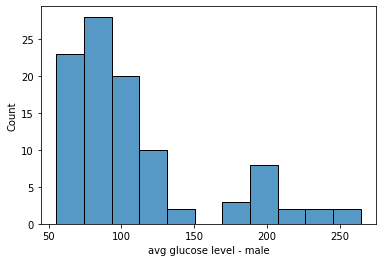

In [51]:
sns.histplot(df4)

In [52]:
shapiro(df4)

ShapiroResult(statistic=0.8200778961181641, pvalue=1.0757815749329325e-09)

In [58]:
kstest(df4,"norm")

KstestResult(statistic=1.0, pvalue=0.0)